<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = 'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'

response = requests.get(url)

with open('names.txt', 'wb') as f:
  f.write(response.content)

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# stoi and itos
chars = sorted(list(set(''.join(words))))
stoi = {char:i+1 for i, char in enumerate(chars)}
stoi['.'] = 0
itos = {i:char for char, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# make dataset
block_size = 3 # context length
X, Y = [], []
for w in words:
  #print(w)
  context = [0] * block_size # list of zeros of length block size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '---->', itos[ix])
    context = context[1:] + [ix] # crop to remove previous, append new to end

X = torch.tensor(X)
Y = torch.tensor(Y)

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
# C should be a 27 x embedding dimension matrix
C = torch.randn((27, 2))

In [9]:
C[stoi['a']]

tensor([ 0.6285, -1.0609])

In [10]:
aonehot = F.one_hot(torch.tensor(stoi['a']), num_classes=27).float()
aonehot @ C

tensor([ 0.6285, -1.0609])

In [11]:
C[[5, 6, 7]]

tensor([[ 0.3767, -1.2584],
        [ 0.4520,  0.3483],
        [-0.6715,  0.8732]])

In [12]:
C[torch.tensor([0,0,0])]

tensor([[-0.3376, -0.3365],
        [-0.3376, -0.3365],
        [-0.3376, -0.3365]])

In [13]:
for data in X[:5]:
  enc = C[data]
  print(enc)

tensor([[-0.3376, -0.3365],
        [-0.3376, -0.3365],
        [-0.3376, -0.3365]])
tensor([[-0.3376, -0.3365],
        [-0.3376, -0.3365],
        [ 0.3767, -1.2584]])
tensor([[-0.3376, -0.3365],
        [ 0.3767, -1.2584],
        [-1.2019,  0.6633]])
tensor([[ 0.3767, -1.2584],
        [-1.2019,  0.6633],
        [-1.2019,  0.6633]])
tensor([[-1.2019,  0.6633],
        [-1.2019,  0.6633],
        [ 0.6285, -1.0609]])


In [14]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [15]:
%time
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


torch.Size([228146, 6])

In [16]:
%time
torch.flatten(emb, start_dim=1).shape

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


torch.Size([228146, 6])

In [17]:
%time
torch.cat(torch.unbind(emb, 1), 1).shape

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


torch.Size([228146, 6])

Idk bruh I think mine is still better

In [18]:
a = torch.arange(18)
a, a.shape

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 torch.Size([18]))

In [19]:
a.view(3, 6) # holy moly where has this been all my life

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

2 microseconds bruv

In [58]:
C = torch.randn((27, 2))
w1 = torch.randn(6, 100)
b1 = torch.randn(100)
w2 = torch.randn(100, 27)
b2 = torch.randn(27)

wi1 = emb.view(-1, 6) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

parameters = [C, w1, b1, w2, b2]
for p in parameters:
  p.requires_grad = True
probs.shape

torch.Size([32, 27])

In [59]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [60]:
lri =[]
lossi = []

for x in range(1000):

  # minibatch
  ix = torch.randint(0, X.shape[0], (32, ))


  emb = C[X[ix]]
  wi1 = emb.view(-1, 6) @ w1
  wi1b = wi1 + b1
  wi1ba = wi1b.tanh()
  wi2 = wi1ba @ w2
  logits = wi2 + b2



  for p in parameters:
    p.grad = None

  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())
  loss.backward()
  lr = lrs[x]
  for p in parameters:
    p.data = -lr * 0.05

  lri.append(lre[x])
  lossi.append(loss.item())
print(loss.item())

13.769243240356445


IndexError: ignored

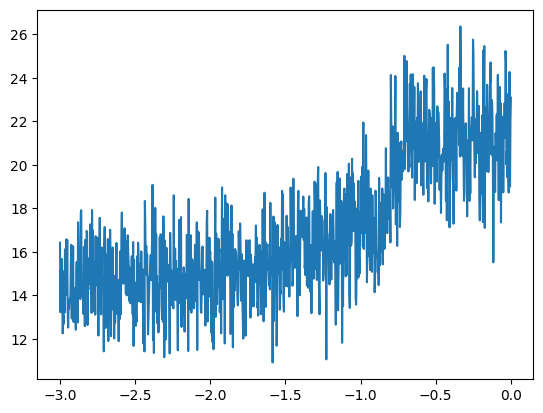

In [55]:
plt.plot(lri, lossi)

In [ ]:
emb = C[X]
wi1 = emb.view(-1, 6) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

In [31]:
def prompt(context, max_length=15):
  out = context
  length = 0
  cx = [0] * block_size
  cx = cx[len(context):] + [stoi[c] for c in context]
  while True:
    length += 1
    emb = C[cx]
    wi1 = emb.view(-1, 6) @ w1
    wi1b = wi1 + b1
    wi1ba = wi1b.tanh()
    wi2 = wi1ba @ w2
    logits = wi2 + b2
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    char = itos[torch.multinomial(probs, num_samples=1).item()]
    print(char)
    if char == '.' or length==max_length:
      break
    out += char
  return out

prompt("br")

.


'br'

In [ ]:
torch.randint(0, X.shape[0], (32,))